In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm

In [2]:
#!pip install pmdarima

In [3]:
data = pd.read_csv("M0074_2544_RMF",parse_dates=['nav_date'])
#1.M0017_2565_SSF.csv
#2.M0110_2564_SSF.csv
#3.M0005_2558_SSF.csv
#4.M0120_2564_SSF.csv
#5.M0134_2564_SSF.csv
#6.M0144_2563_SSF.csv
# 7.M0151_2563_SSF.csv
#M0152_2564_SSF.csv


# M0284_2555_SSF 

In [4]:
data

,2017.05.03\t01:00:00\t1256.35\t1256.63\t1255.89\t1256.48\t672\t0\t0
0,2017.05.03\t01:01:00\t1256.77\t1256.87\t1256.6...
1,2017.05.03\t01:02:00\t1256.81\t1256.95\t1256.6...
2,2017.05.03\t01:03:00\t1256.80\t1256.86\t1256.4...
3,2017.05.03\t01:04:00\t1256.56\t1256.57\t1256.5...
4,2017.05.03\t01:05:00\t1256.57\t1256.88\t1256.3...
...,...
2324469,2023.09.15\t23:45:00\t1923.50\t1923.54\t1923.3...
2324470,2023.09.15\t23:46:00\t1923.55\t1923.67\t1923.5...
2324471,2023.09.15\t23:47:00\t1923.64\t1923.75\t1923.6...
2324472,2023.09.15\t23:48:00\t1923.75\t1923.81\t1923.7...


In [5]:
data['nav_date'] = pd.to_datetime(data['nav_date'])

In [6]:
df = data.copy()

In [7]:
df = pd.DataFrame(df["last_val"])

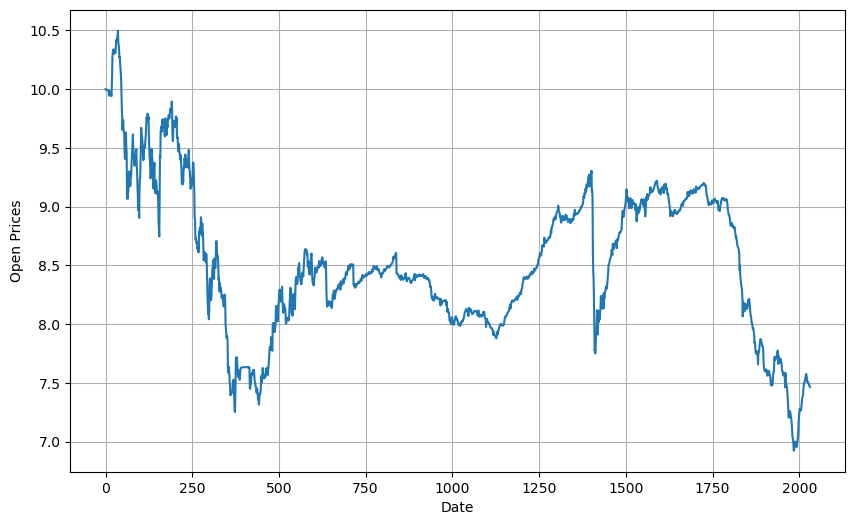

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(df)

plt.show()

In [9]:
df.shape

(2032, 1)

In [10]:
#num = 30

In [11]:
#train_size = int(len(df)-num)
#test_size = len(df) - train_size
train_size = int(len(dfnew)*0.70)
test_size = len(dfnew) - train_size

In [12]:
print(train_size)
print(test_size)

2002
30


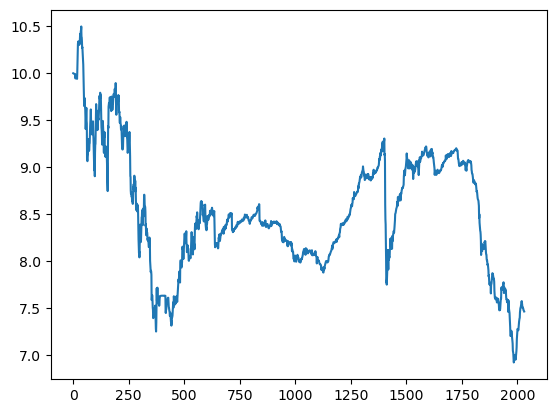

In [13]:
train_data = df.iloc[:-num]
test_data = df.iloc[-num:]
plt.plot(df)

In [14]:
df.shape

(2032, 1)

In [15]:
#df = df.reshape(-1,1)

In [16]:
df.shape

(2032, 1)

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)
df_scaled = result = np.append(train_scaled, test_scaled)

In [18]:
train_scaled

array([[0.86073257],
       [0.86050872],
       [0.85983714],
       ...,
       [0.07921762],
       [0.08990682],
       [0.09986848]])

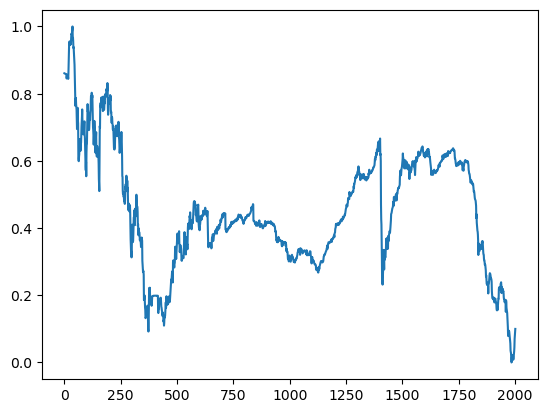

In [19]:
plt.plot(train_scaled)

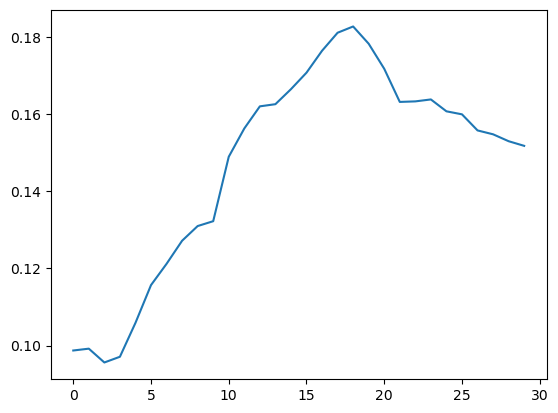

In [20]:
plt.plot(test_scaled)

In [21]:
auto_arima = pm.auto_arima(train_scaled, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [22]:
train_data2 = train_scaled

In [23]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_scaled)+5)


In [24]:
print(forecast_test_auto)

[0.10162601 0.10222429 0.102224   0.10184054 0.10145708 0.10107362
 0.10069015 0.10030669 0.09992323 0.09953977 0.09915631 0.09877285
 0.09838939 0.09800593 0.09762247 0.09723901 0.09685555 0.09647209
 0.09608863 0.09570517 0.0953217  0.09493824 0.09455478 0.09417132
 0.09378786 0.0934044  0.09302094 0.09263748 0.09225402 0.09187056
 0.0914871  0.09110364 0.09072018 0.09033672 0.08995326]


In [25]:
len(forecast_test_auto)

35

In [26]:
len(train_data)

2002

In [27]:
len(test_data)

30

In [28]:
len(df)

2032

In [29]:
train_data

,last_val
0,9.9982
1,9.9974
2,9.9950
3,9.9931
4,9.9924
...,...
1997,7.0853
1998,7.1726
1999,7.2053
2000,7.2435


In [30]:
forecast_test_auto

array([0.10162601, 0.10222429, 0.102224  , 0.10184054, 0.10145708,
       0.10107362, 0.10069015, 0.10030669, 0.09992323, 0.09953977,
       0.09915631, 0.09877285, 0.09838939, 0.09800593, 0.09762247,
       0.09723901, 0.09685555, 0.09647209, 0.09608863, 0.09570517,
       0.0953217 , 0.09493824, 0.09455478, 0.09417132, 0.09378786,
       0.0934044 , 0.09302094, 0.09263748, 0.09225402, 0.09187056,
       0.0914871 , 0.09110364, 0.09072018, 0.09033672, 0.08995326])

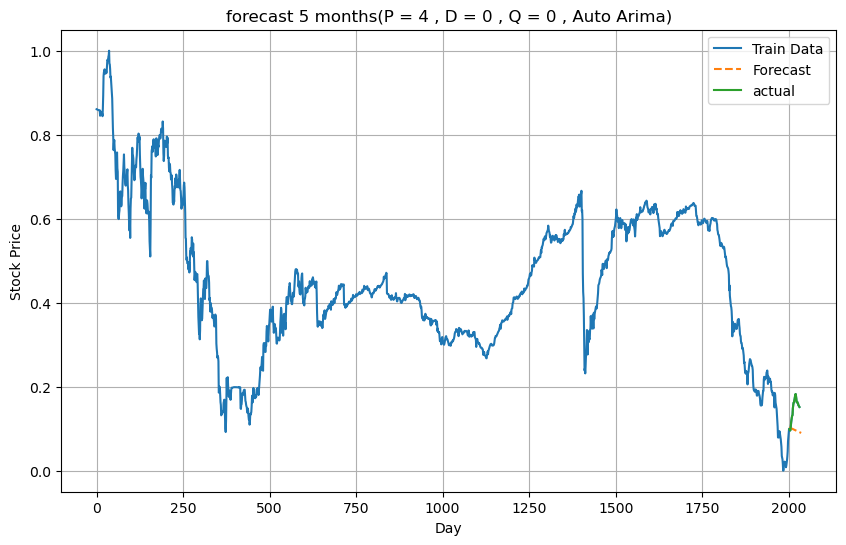

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_scaled, label='Train Data')

plt.plot(range(train_size,train_size+test_size+5),forecast_test_auto, label='Forecast', linestyle='dashed')
plt.plot(range(train_size,train_size+test_size),test_scaled,label = "actual")
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title("forecast 5 months(P = 4 , D = 0 , Q = 0 , Auto Arima)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
asd= 5

In [33]:
forcastnew_data = forecast_test_auto[:-asd]

In [34]:
forcastnew_data.shape

(30,)

In [35]:
forcastnew_data

array([0.10162601, 0.10222429, 0.102224  , 0.10184054, 0.10145708,
       0.10107362, 0.10069015, 0.10030669, 0.09992323, 0.09953977,
       0.09915631, 0.09877285, 0.09838939, 0.09800593, 0.09762247,
       0.09723901, 0.09685555, 0.09647209, 0.09608863, 0.09570517,
       0.0953217 , 0.09493824, 0.09455478, 0.09417132, 0.09378786,
       0.0934044 , 0.09302094, 0.09263748, 0.09225402, 0.09187056])

In [36]:
MSE_error = mean_squared_error(test_scaled, forcastnew_data)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.0033169855548611394


In [37]:
x = forcastnew_data.reshape(-1,1)

In [38]:
x1 = scaler.inverse_transform(x)

In [39]:
x1

array([[7.28538087],
       [7.28751893],
       [7.2875179 ],
       [7.28614753],
       [7.28477715],
       [7.28340678],
       [7.28203641],
       [7.28066603],
       [7.27929566],
       [7.27792528],
       [7.27655491],
       [7.27518454],
       [7.27381416],
       [7.27244379],
       [7.27107342],
       [7.26970304],
       [7.26833267],
       [7.2669623 ],
       [7.26559192],
       [7.26422155],
       [7.26285118],
       [7.2614808 ],
       [7.26011043],
       [7.25874006],
       [7.25736968],
       [7.25599931],
       [7.25462894],
       [7.25325856],
       [7.25188819],
       [7.25051782]])

In [40]:
dfcompared = pd.DataFrame(test_data)

In [41]:
dfcompared["predict"] = x1

In [42]:
dfcompared

,last_val,predict
2002,7.2750,7.285381
2003,7.2767,7.287519
2004,7.2639,7.287518
2005,7.2692,7.286148
2006,7.3006,7.284777
2007,7.3356,7.283407
2008,7.3553,7.282036
2009,7.3767,7.280666
2010,7.3903,7.279296
2011,7.3948,7.277925
